In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.dataloader import Dataloader

df_rating = Dataloader.load_train_ratings()
df_tbr = Dataloader.load_train_tbr()
df_samp_sub = Dataloader.load_sample_submission()

In [2]:
print(f"#rating samples: {len(df_rating):,}, #tbr samples: {len(df_tbr):,}")

#rating samples: 1,128,187, #tbr samples: 328,839


In [3]:
print(f'num unique sid in tbd: {len(df_tbr['sid'].unique())}\nnum unique sid in ratings: {len(df_rating['sid'].unique())}')

num unique sid in tbd: 9566
num unique sid in ratings: 10000


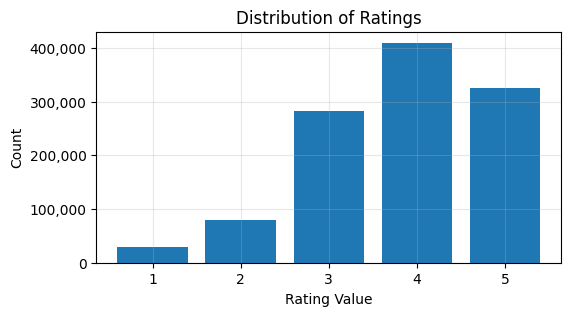

In [4]:
# observed ratings
rating_counts = df_rating['rating'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribution of Ratings')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(alpha=0.3)

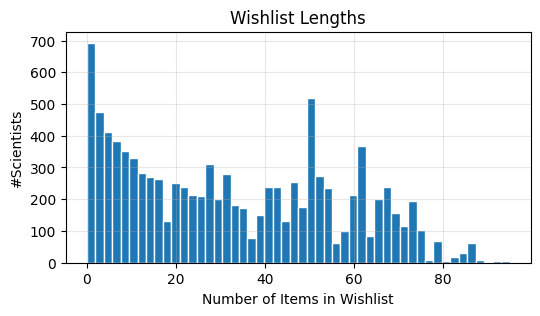

In [5]:
# wishlist length by scientis
wishlist_lengths = df_tbr.groupby('sid').size()

# add scientists w/o len 0 list
tbr_sid = set(df_tbr['sid'].unique())
rating_sid = set(df_rating['sid'].unique())
for sid in (rating_sid - tbr_sid):
    wishlist_lengths[sid] = 0


plt.figure(figsize=(6, 3))
plt.hist(wishlist_lengths, bins=50, edgecolor='w')
plt.title('Wishlist Lengths')
plt.xlabel('Number of Items in Wishlist')
plt.ylabel('#Scientists')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(alpha=0.3)

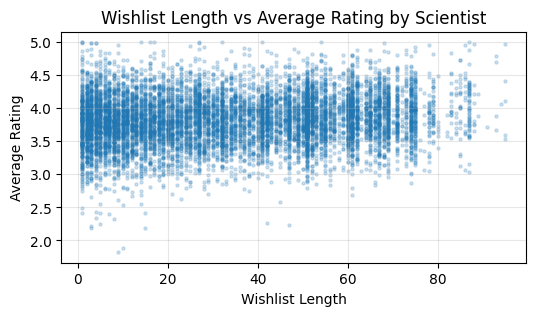

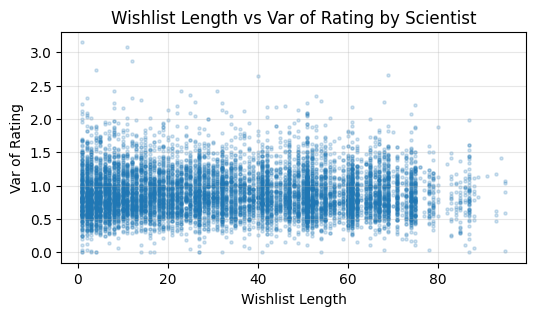

In [6]:
# Calculate average rating per scientist
avg_ratings = df_rating.groupby('sid')['rating'].mean()
var_ratings = df_rating.groupby('sid')['rating'].var()

# Get wishlist lengths
wishlist_lengths = df_tbr.groupby('sid').size()

# Combine the data with explicit join
combined_data = pd.DataFrame({
    'avg_rating': avg_ratings,
    'var_rating': var_ratings
}).join(
    pd.DataFrame({'wishlist_length': wishlist_lengths}), 
    on='sid', 
    how='inner'
)

plt.figure(figsize=(6, 3))
plt.scatter(combined_data['wishlist_length'], combined_data['avg_rating'], alpha=0.2, s=5)
plt.xlabel('Wishlist Length')
plt.ylabel('Average Rating')
plt.title('Wishlist Length vs Average Rating by Scientist')
plt.grid(alpha=0.3)

plt.figure(figsize=(6, 3))
plt.scatter(combined_data['wishlist_length'], combined_data['var_rating'], alpha=0.2, s=5)
plt.xlabel('Wishlist Length')
plt.ylabel('Var of Rating')
plt.title('Wishlist Length vs Var of Rating by Scientist')
plt.grid(alpha=0.3)

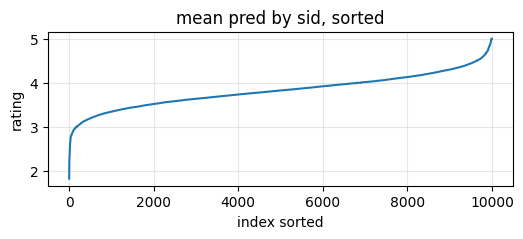

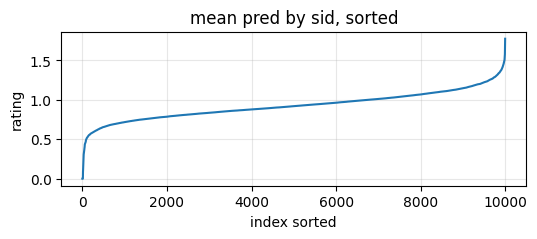

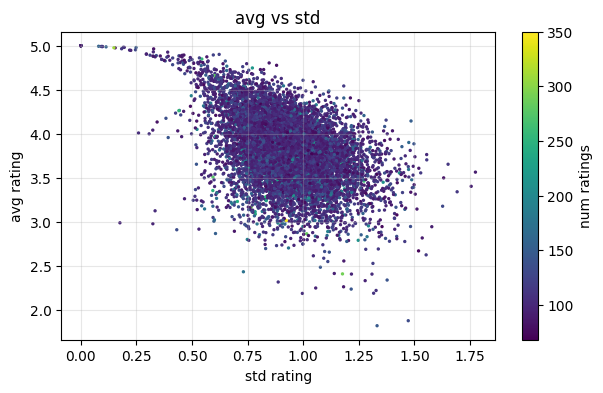

In [7]:
# mean and std sorted
avg_ratings = df_rating.groupby('sid')['rating'].mean()
std_ratings = df_rating.groupby('sid')['rating'].std()
count_ratings = df_rating.groupby('sid')['rating'].count()

plt.figure(figsize=(6, 2))
plt.plot(avg_ratings.sort_values().values)
plt.ylabel('rating')
plt.xlabel('index sorted')
plt.title('mean pred by sid, sorted')
plt.grid(alpha=0.3)

plt.figure(figsize=(6, 2))
plt.plot(std_ratings.sort_values().values)
plt.ylabel('rating')
plt.xlabel('index sorted')
plt.title('mean pred by sid, sorted')
plt.grid(alpha=0.3)

plt.figure(figsize=(7, 4))
plt.scatter(std_ratings.values, avg_ratings.values, s=2, c=count_ratings.values)
plt.colorbar(label='num ratings')
plt.ylabel('avg rating')
plt.xlabel('std rating')
plt.title('avg vs std')
plt.grid(alpha=0.3)

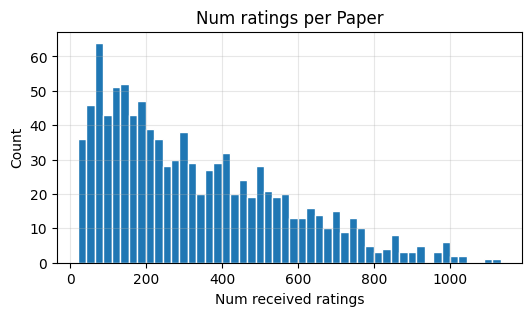

In [8]:
# num ratings by paper
num_ratings = df_tbr.groupby('pid').size()
plt.figure(figsize=(6, 3))
plt.hist(num_ratings, bins=50, edgecolor='w')
plt.title('Num ratings per Paper')
plt.xlabel('Num received ratings')
plt.ylabel('Count')
plt.grid(alpha=0.3)

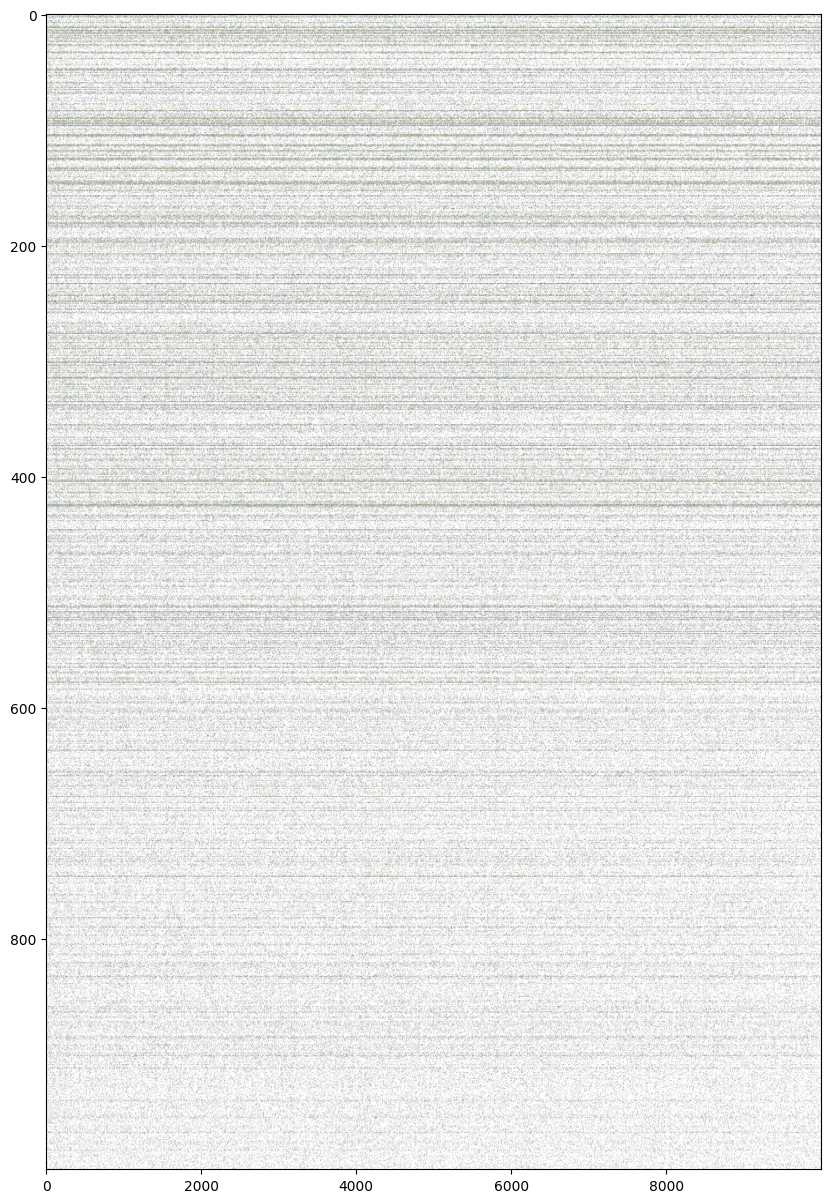

In [9]:
rating_matrix = df_rating.pivot_table(
    values='rating',
    index='sid',
    columns='pid',
).to_numpy()

plt.figure(figsize=(10,15))
plt.imshow(rating_matrix.T, aspect='auto')

# user/item in submission not in train set?

In [10]:
samp_sub_sid = set(df_samp_sub['sid'].unique())
tbr_sid = set(df_tbr['sid'].unique())
rating_sid = set(df_rating['sid'].unique())

print(f"sid in subission not in rating data: {len(samp_sub_sid-rating_sid)}")
print(f"sid in subission not in tbr data:    {len(samp_sub_sid-tbr_sid)}")

samp_sub_pid = set(df_samp_sub['pid'].unique())
tbr_pid = set(df_tbr['pid'].unique())
rating_pid = set(df_rating['pid'].unique())

print(f"pid in subission not in rating data: {len(samp_sub_pid-rating_pid)}")
print(f"pid in subission not in tbr data:    {len(samp_sub_pid-tbr_pid)}")


sid in subission not in rating data: 0
sid in subission not in tbr data:    434
pid in subission not in rating data: 0
pid in subission not in tbr data:    0
